In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [2]:
# prepare the data

data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(cur_path)

c:\Users\User\Desktop\AI Capstone\Prog 1\GTSRB


In [3]:
# Load the images and lables from the dataset

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
# Convert the data and labels into numpy arrays
data = np.array(data)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=8)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [5]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='tanh'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(43, activation='softmax'))

In [6]:
# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/20
919/919 [==============================] - 9s 3ms/step - loss: 1.1265 - accuracy: 0.6908 - val_loss: 0.5263 - val_accuracy: 0.8473
Epoch 2/20
919/919 [==============================] - 3s 3ms/step - loss: 0.3867 - accuracy: 0.8892 - val_loss: 0.2964 - val_accuracy: 0.9103
Epoch 3/20
919/919 [==============================] - 3s 3ms/step - loss: 0.2764 - accuracy: 0.9165 - val_loss: 0.2462 - val_accuracy: 0.9194
Epoch 4/20
919/919 [==============================] - 3s 3ms/step - loss: 0.2055 - accuracy: 0.9380 - val_loss: 0.2918 - val_accuracy: 0.9088
Epoch 5/20
919/919 [==============================] - 3s 3ms/step - loss: 0.1858 - accuracy: 0.9422 - val_loss: 0.2652 - val_accuracy: 0.9207
Epoch 6/20
919/919 [==============================] - 3s 3ms/step - loss: 0.1731 - accuracy: 0.9455 - val_loss: 0.2282 - val_accuracy: 0.9294
Epoch 7/20
919/919 [==============================] - 3s 3ms/step - loss: 0.1655 - accuracy: 0.9485 - val_loss: 0.2236 - val_accuracy: 0.9277
Epoch 

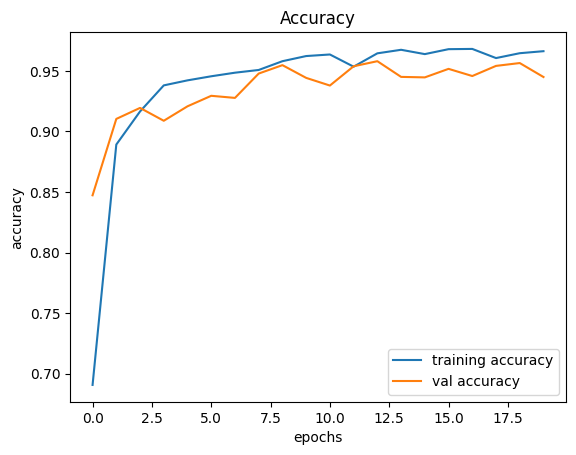

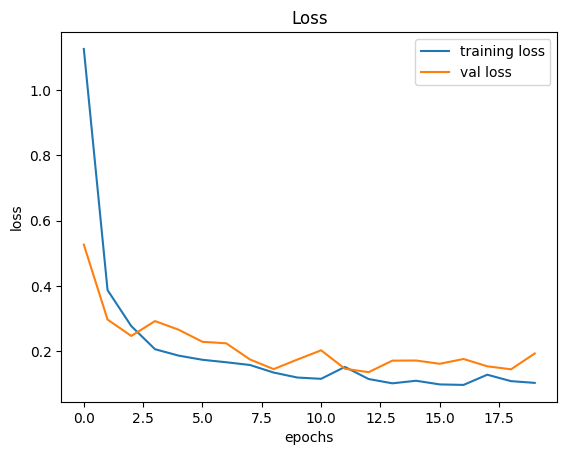

In [7]:
# Plot the loss and accuracy curves for training and validation
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Test


In [8]:
# Load the test dataset
test = pd.read_csv('Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)

pred = np.argmax(pred, axis=1)


print(accuracy_score(labels, pred))


395/395 [==============================] - 1s 1ms/step
0.8803642121931908


Text(158.22222222222223, 0.5, 'Truth')

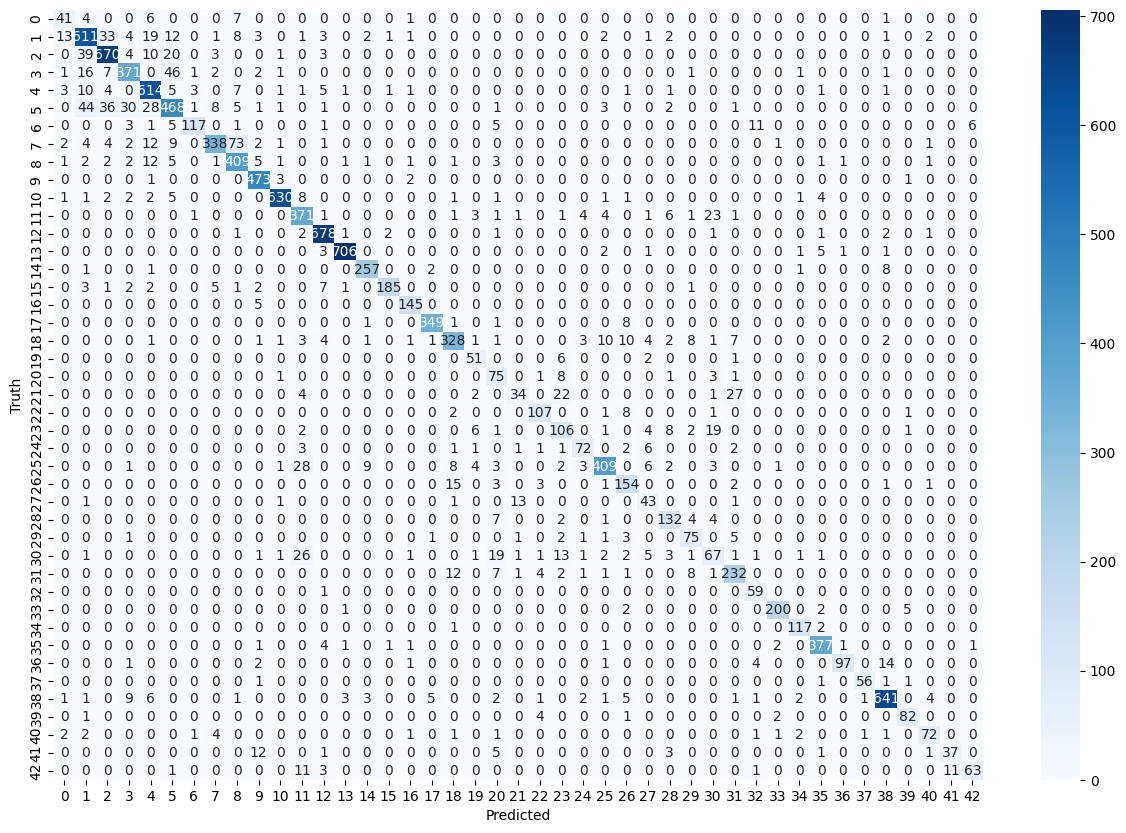

In [9]:
# Plot the confusion matrix

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(labels, pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')